In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head(5)

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [4]:
eda_train = train.copy()

Answers = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
          'Q14', 'Q15', 'Q16','Q17', 'Q18', 'Q19','Q20']

<AxesSubplot:>

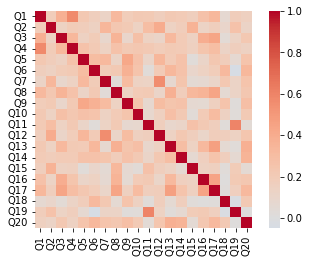

In [5]:
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [6]:
x_train = train.copy()
x_train.drop('nerdiness', axis=1, inplace = True)
y_train = train['nerdiness']

In [7]:
dataset = [x_train, test]

In [8]:
for i in x_train:   # 결측치를 최빈값으로 채움
    replace = x_train.loc[:,i].value_counts().index[0]
    x_train[i] = x_train[i].fillna(replace)

In [10]:
for i in x_train:
    replace = x_train.loc[:,i].value_counts().index[0]
    test[i] = test[i].fillna(replace)

In [11]:
x_train.isnull().sum()

index          0
Q1             0
Q2             0
Q3             0
Q4             0
              ..
orientation    0
voted          0
married        0
familysize     0
ASD            0
Length: 69, dtype: int64

In [12]:
test.isnull().sum()

index          0
Q1             0
Q2             0
Q3             0
Q4             0
              ..
orientation    0
voted          0
married        0
familysize     0
ASD            0
Length: 69, dtype: int64

In [13]:
for data in dataset:
    data['Math_score'] = data[Answers].mean(axis=1)  # 총 스코어 칼럼

<AxesSubplot:>

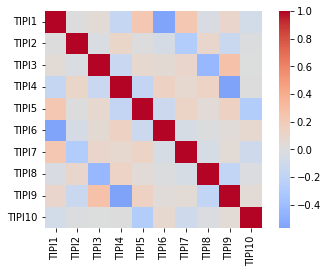

In [14]:
TIPI = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']

correlations = eda_train[TIPI].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [15]:
for data in dataset:
  data['Ex'] = data['TIPI1']-data['TIPI6']
  data['Ag'] = data['TIPI2']-data['TIPI7']
  data['Con'] = data['TIPI3']-data['TIPI8']
  data['Es'] =data['TIPI4']-data['TIPI9']
  data['Op'] =data['TIPI5']-data['TIPI10']

In [16]:
x_train.head(5)

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,voted,married,familysize,ASD,Math_score,Ex,Ag,Con,Es,Op
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,2.0,1.0,4.0,2.0,4.05,-1.0,-2.0,2.0,-4.0,0.0
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,2.0,4.0,2.0,3.40,2.0,-3.0,2.0,3.0,1.0
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,3.0,4.0,2.0,4.00,-4.0,-1.0,-1.0,-4.0,3.0
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,2.0,1.0,2.0,2.0,3.55,0.0,-1.0,-1.0,1.0,2.0
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,1.0,1.0,2.0,3.45,-1.0,0.0,0.0,1.0,2.0


In [17]:
x_train = x_train.drop(['index', 'country'], axis=1)
test = test.drop(['index', 'country'], axis=1)

In [18]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=10000)
lgbm_clf.fit(x_train, y_train)

lgbm_pred = lgbm_clf.predict(test)

In [21]:
submission = pd.read_csv('data/sample_submission.csv')

submission['nerdiness'] = lgbm_pred